# Required Libraries – Explained

## General Libraries

| Library | Purpose |
|--------|---------|
| %matplotlib inline | Displays plots directly in the Jupyter Notebook |
| pandas | For data loading, cleaning, and manipulation |
| seaborn | Used for statistical data visualization |
| matplotlib.pyplot | For creating static, animated, and interactive visualizations |
| pickle | For saving and loading Python objects like trained models |

---

## Scikit-learn Modules

| Function | Description |
|----------|-------------|
| train_test_split | Splits dataset into training and testing sets |
| StandardScaler | Scales/standardizes numeric features (mean=0, std=1) |
| LabelEncoder | Converts categorical data into numeric values |
| SVR | Support Vector Regressor: predicts continuous target values |
| mean_squared_error | Measures average squared difference between predicted and actual values |
| r2_score | Indicates how well predictions match actual values (closer to 1 is better) |

---

Note: These libraries and functions are essential for building and evaluating machine learning models, especially in regression-based tasks like predicting Seoul bike demand.


In [49]:
# === Required Libraries ===
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score




In [79]:
# Importing the pandas library for data handling
import pandas as pd

# Creating a class to handle data loading and understanding
class DataHandler:
    def __init__(self, filepath):
        # Save the file path
        self.filepath = filepath
        # This will hold the loaded DataFrame
        self.data = None

    def load_data(self):
        # Read the CSV file using pandas
        self.data = pd.read_csv(self.filepath, encoding='latin1')
        # Print the first few rows to confirm data is loaded
        print("\nData Loaded:\n", self.data.head())
        return self.data

    def understand_data(self):
        # Print basic information about the data (columns, data types, null values)
        print("\nData Info")
        print(self.data.info())

        # Print summary statistics for numerical columns
        print("\nSummary Statistics")
        print(self.data.describe())

        # Print count of missing values in each column
        print("\nMissing Values")
        print(self.data.isnull().sum())

# Create an object of DataHandler with the CSV file path
handler = DataHandler("SeoulBikeData.csv")

# Load the data into a DataFrame
df = handler.load_data()

# Display information and statistics about the data
handler.understand_data()



Data Loaded:
          Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter 

In [80]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# This class handles preprocessing of the data
class Preprocessor:
    def __init__(self, data):
        # Store the original data
        self.data = data

    def preprocess(self):
        # Step 1: Create a copy of the original data to avoid accidental changes
        df = self.data.copy()

        # Step 2: Drop the 'Date' column since it's not useful for prediction
        df.drop(columns=['Date'], inplace=True)

        # Step 3: Label encode categorical columns so they can be used in machine learning
        label_cols = ['Seasons', 'Holiday', 'Functioning Day']
        for col in label_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

        # Step 4: Split the data into input features (X) and target (y)
        X = df.drop(columns=['Rented Bike Count'])  # all columns except the target
        y = df['Rented Bike Count']                 # the value we want to predict

        # Step 5: Standardize the input features for better performance
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Return the scaled features and the target
        return X_scaled, y


In [82]:
prep = Preprocessor(df)        # Pass the loaded DataFrame
X_scaled, y = prep.preprocess()  # Get preprocessed inputs and target


In [28]:
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [83]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# This class prepares the data for model training
class Preprocessor:
    def __init__(self, data):
        # Save the input DataFrame
        self.data = data

    def preprocess(self):
        # Make a copy of the original data to avoid modifying it directly
        df = self.data.copy()

        # Drop the 'Date' column as it is not needed for prediction
        df.drop(columns=['Date'], inplace=True)

        # Convert categorical string columns to numeric using label encoding
        label_cols = ['Seasons', 'Holiday', 'Functioning Day']
        for col in label_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

        # Separate input features (X) and target variable (y)
        X = df.drop(columns=['Rented Bike Count'])  # Features
        y = df['Rented Bike Count']                 # Target

        # Standardize the feature values (important for many ML models)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Return the preprocessed input features and target
        return X_scaled, y


In [30]:
prep = Preprocessor(df)
X_scaled, y = prep.preprocess()


In [31]:
print(df.columns)


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [34]:
df = pd.read_csv("SeoulBikeData.csv", encoding='latin1')
df.head()  # Just to check it's loaded


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [84]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

class Preprocessor:
    def __init__(self, data):
        self.data = data  # Store the original DataFrame

    def preprocess(self):
        df = self.data.copy()  # Make a copy to avoid changing the original

        # Drop the 'Date' column if it exists, since it's not useful for modeling
        if 'Date' in df.columns:
            df.drop(columns=['Date'], inplace=True)

        # Convert categorical (text-based) columns to numbers
        label_cols = ['Seasons', 'Holiday', 'Functioning Day']
        for col in label_cols:
            if df[col].dtype == 'object':  # Only encode if it's text
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])

        # Check if the target column exists before proceeding
        if 'Rented Bike Count' not in df.columns:
            raise ValueError("'Rented Bike Count' column missing!")

        # Split dataset into features (X) and target (y)
        X = df.drop(columns=['Rented Bike Count'])
        y = df['Rented Bike Count']

        # Standardize the input features using StandardScaler
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        return X_scaled, y


In [76]:
prep = Preprocessor(df)
X_scaled, y = prep.preprocess()

print(" Preprocessing successful!")
print("X shape:", X_scaled.shape)
print("y shape:", y.shape)


 Preprocessing successful!
X shape: (8760, 12)
y shape: (8760,)


In [42]:
print(df.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


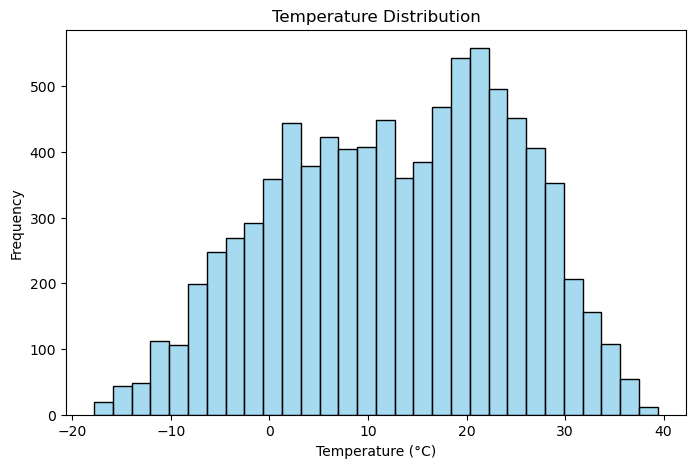

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Temperature(°C)', bins=30, color='skyblue')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


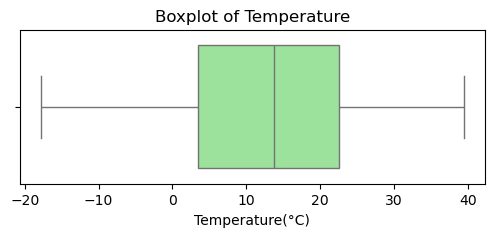

In [59]:
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Temperature(°C)'], color='lightgreen')
plt.title("Boxplot of Temperature")
plt.show()


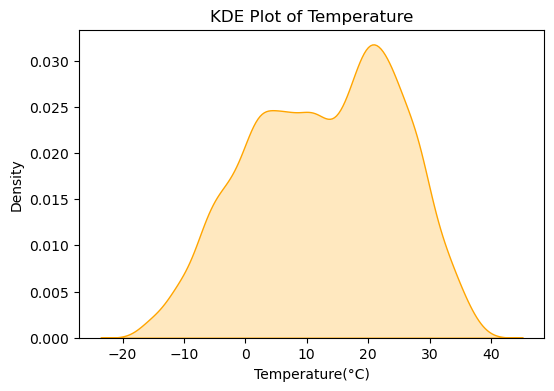

In [61]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df['Temperature(°C)'], fill=True, color='orange')
plt.title("KDE Plot of Temperature")
plt.show()


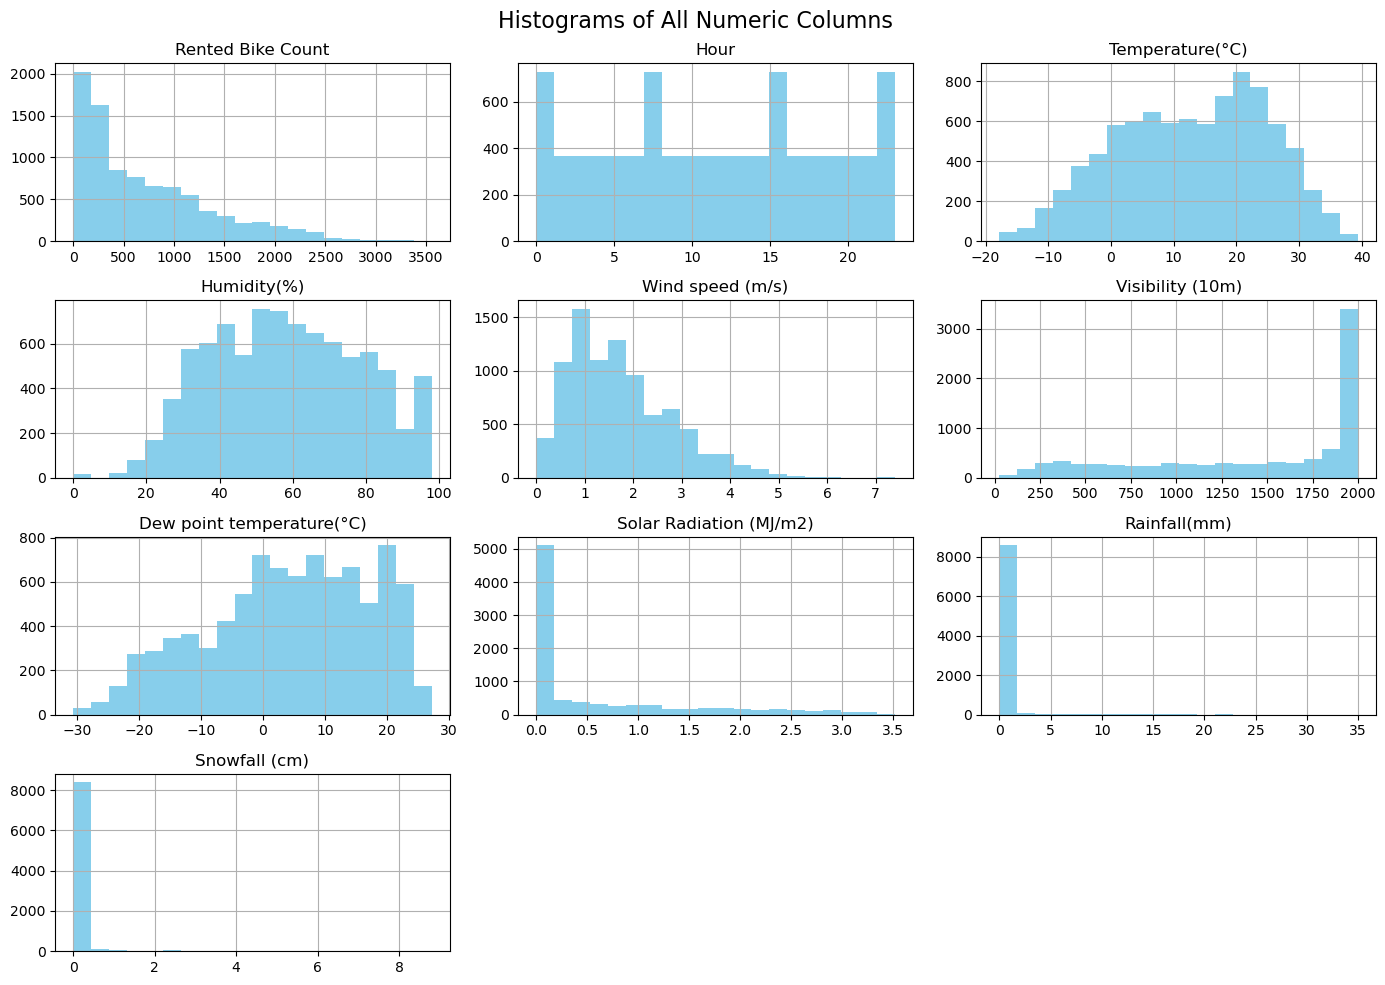

In [62]:
df.select_dtypes(include='number').hist(figsize=(14, 10), bins=20, color='skyblue')
plt.suptitle("Histograms of All Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()


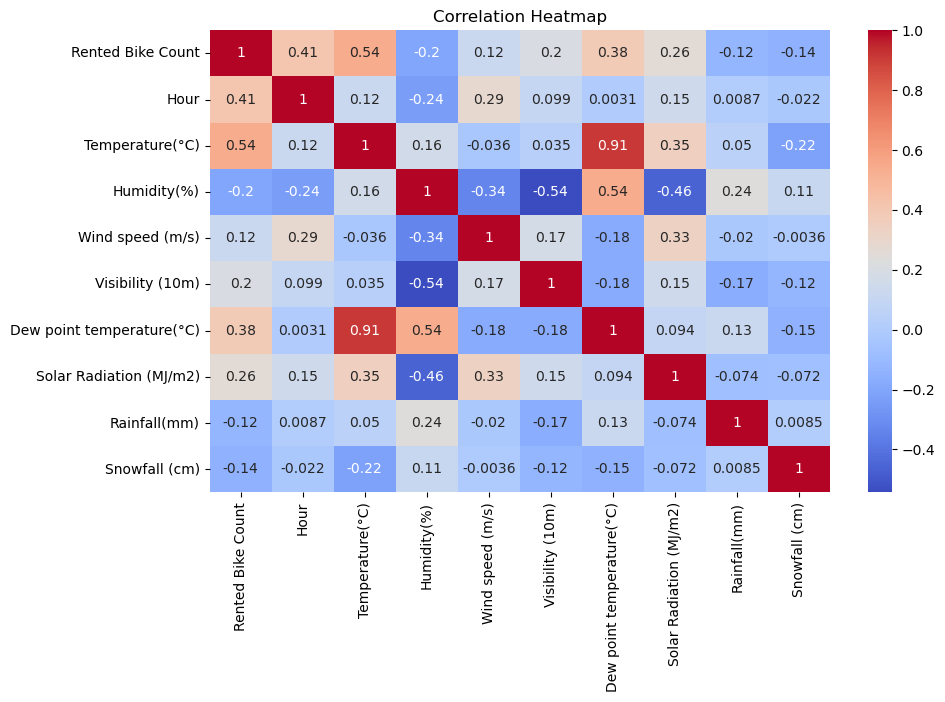

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Remove non-numeric or unnecessary columns
df = df.drop(columns=['Date'])  # Drop 'Date' column

# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Drop Date column
df = df.drop(columns=['Date'])

# Convert categorical to numeric (get_dummies)
df = pd.get_dummies(df, drop_first=True)

# Features & target
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [75]:
model = SVR()  #  Yeh line zaroori hai
model.fit(X_scaled, y)


SVR()

In [74]:
y_pred = model.predict(X_scaled)

print(" R² Score:", r2_score(y, y_pred))
print(" Mean Squared Error:", mean_squared_error(y, y_pred))


 R² Score: 0.4260637280208307
 Mean Squared Error: 238742.7058791089


In [71]:
import pickle

# Model ko save karo
with open("bike_model.pkl", "wb") as file:
    pickle.dump(model, file)

print(" Model successfully saved as 'bike_model.pkl'")


✅ Model successfully saved as 'bike_model.pkl'


In [73]:
# Model ko load karo
with open("bike_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print(" Model loaded successfully!")

# Test prediction
sample = X_scaled[0].reshape(1, -1)
print(" Prediction on first sample:", loaded_model.predict(sample)[0])
# Model ko load karo
with open("bike_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print(" Model loaded successfully!")

# Test prediction
sample = X_scaled[0].reshape(1, -1)
print(" Prediction on first sample:", loaded_model.predict(sample)[0])


 Model loaded successfully!
 Prediction on first sample: 141.351097310515
 Model loaded successfully!
 Prediction on first sample: 141.351097310515
